# Задание 4

Давайте подробнее остановимся на платящих пользователях, копнём немного глубже и выясним, как много платящих пользователей совершают более одного заказа в день. В конце концов нам важно понимать, как в большинстве своём ведут себя наши пользователи — они заходят в приложение, чтобы сделать всего один заказ, или же наш сервис настолько хорош, что они готовы пользоваться им несколько раз в день.



Задание:

Для каждого дня, представленного в таблице user_actions, рассчитайте следующие показатели:

1. Долю пользователей, сделавших в этот день всего один заказ, в общем количестве платящих пользователей.
2. Долю пользователей, сделавших в этот день несколько заказов, в общем количестве платящих пользователей.
Колонки с показателями назовите соответственно single_order_users_share, several_orders_users_share. Колонку с датами назовите date. Все показатели с долями необходимо выразить в процентах. При расчёте долей округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, single_order_users_share, several_orders_users_share

```sql
with pay_users_all AS (
  SELECT
    ua.time :: date AS date,
    COUNT(distinct ua.user_id) AS paying_users
  FROM
    user_actions ua
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
pay_users_1_order AS (
  SELECT
    date,
    COUNT(DISTINCT user_id) AS users_with_1_order
  FROM
    (
      SELECT
        time :: date AS date,
        user_id
      FROM
        user_actions
      WHERE
        order_id NOT in (
          SELECT
            order_id
          FROM
            user_actions
          WHERE
            action = 'cancel_order'
        )
      GROUP BY
        time :: date,
        user_id
      HAVING
        COUNT(order_id) = 1
    ) AS subq
  GROUP BY
    1
)
SELECT
  pay_users_1_order.date,
  ROUND(
    users_with_1_order / paying_users :: decimal * 100,
    2
  ) AS single_order_users_share,
  ROUND(
    100 - users_with_1_order / paying_users :: decimal * 100,
    2
  ) AS several_orders_users_share
FROM
  pay_users_1_order
  JOIN pay_users_all using (date)
ORDER BY
  1
```

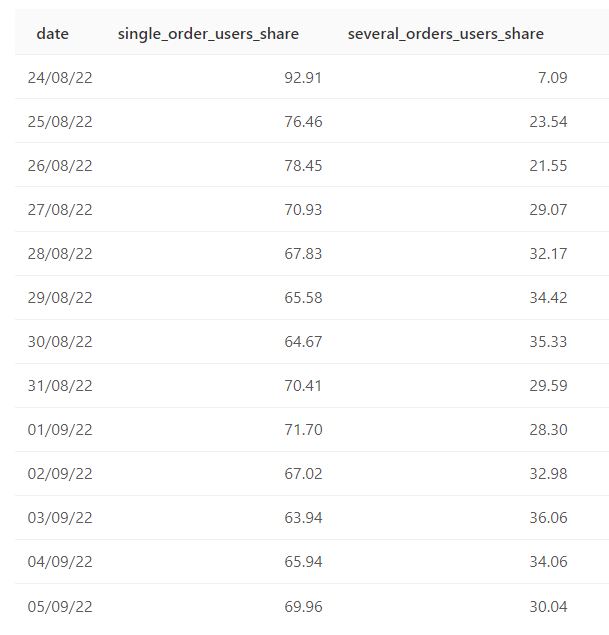

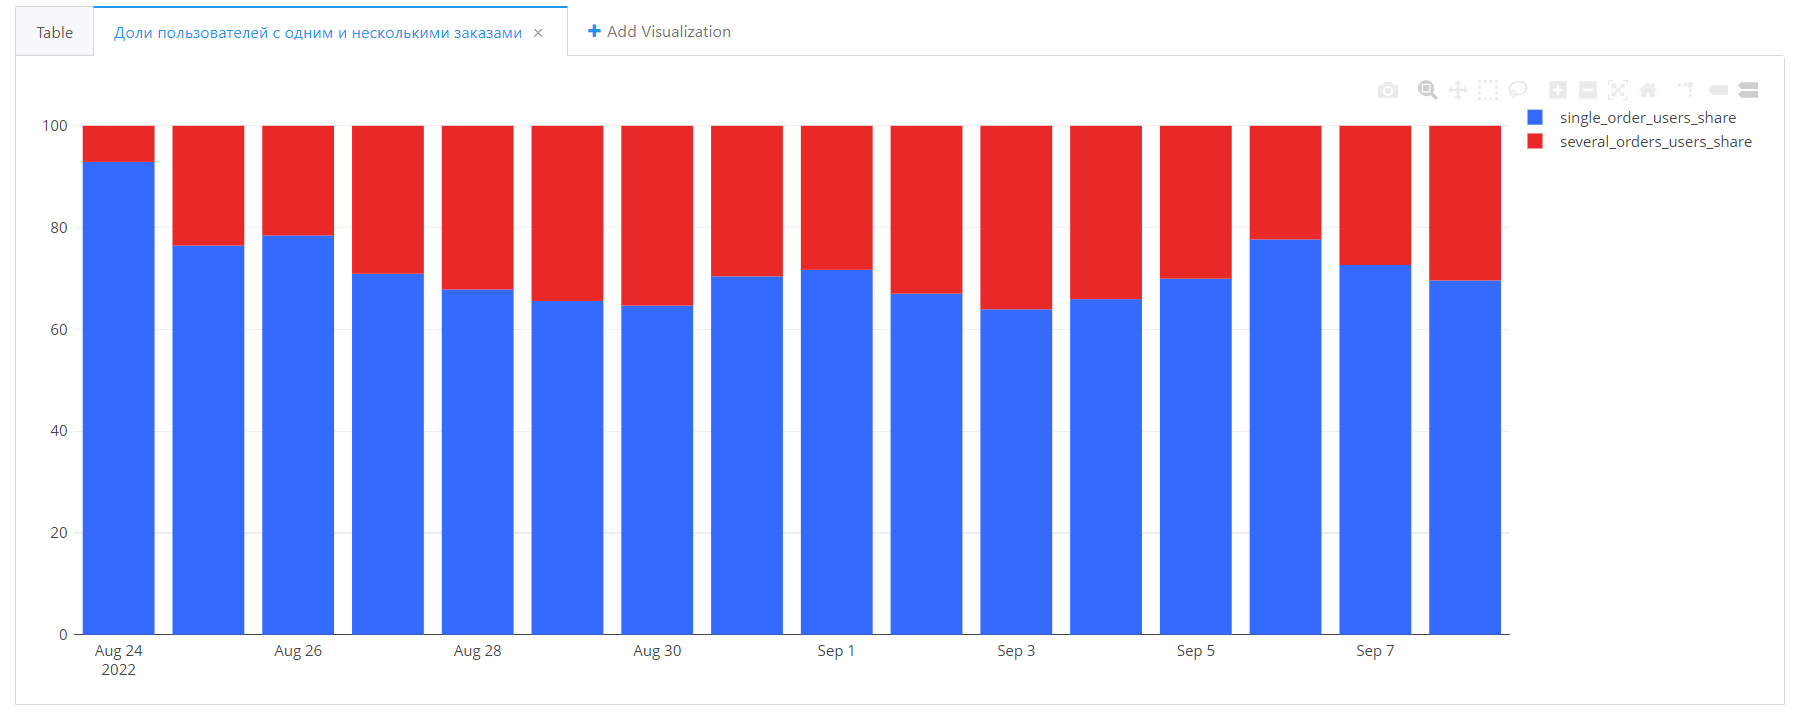